In [9]:
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import time

In [10]:
(X, Y), (X_test, Y_test) = keras.datasets.mnist.load_data()

print("Train dataset shape", X.shape, Y.shape)
print("Test dataset shape", X_test.shape, Y_test.shape)

print(X[1,:,:].shape)

Train dataset shape (60000, 28, 28) (60000,)
Test dataset shape (10000, 28, 28) (10000,)
(28, 28)


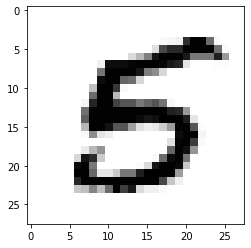

In [13]:
plt.figure()
plt.imshow(X[20000,:,:], cmap='Greys')

In [14]:
print("Train dataset shape", X.shape, Y.shape)
print("Test dataset shape", X_test.shape, Y_test.shape)

Train dataset shape (60000, 28, 28) (60000,)
Test dataset shape (10000, 28, 28) (10000,)


In [15]:
# We will reshape (flatten) X arrays so that they become rank 2 arrays. 
# We will reshape the Y arrays so that they are not rank 1 arrays but rank 2 arrays. 
# They should be rank 2 arrays.

X = X.reshape(X.shape[0], X.shape[1]*X.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

Y = Y.reshape((Y.shape[0],1))
Y_test = Y_test.reshape((Y_test.shape[0],1))

print("Train dataset shape", X.shape, Y.shape)
print("Test dataset shape", X_test.shape, Y_test.shape)

print("Y =", Y)

Train dataset shape (60000, 784) (60000, 1)
Test dataset shape (10000, 784) (10000, 1)
Y = [[5]
 [0]
 [4]
 ...
 [5]
 [6]
 [8]]


In [16]:
m   = X.shape[0] # number of instances 
n_x = X.shape[1] # number of features, pixels in this case

print(m,n_x)

60000 784


In [17]:
#one iteration, semi-vectorized

J = 0
w = np.zeros((n_x,1))  # w is (784,1)
b = 0
alpha = 0.1

dw = 0;
db = 0;

start_time = time.time()

for i in range(m):
    x = np.reshape(X[i], (1,n_x))  # x is (1,784). If we don't do reshape, it is (784,)
    y = Y[i,0]                     # y is scalar

    z = x @ w + b   # w is (784,1). x @ y is a number. z is also a number.
    a = 1/(1+np.exp(-z))  # a is a number
    J += -(y*np.log(a)+(1-y)*np.log(1-a))  # J is a number. It is the cross-entropy cost function.
    
    dz = a - y          # dz is a number
    dw += (x * dz).T    # dw is (1,784).T   i.e. (784,1) so it matches w's dimensions.  
    db += dz            # db is a number
    # We added the contribution of each instance.
        
J /= m; dw /= m; db /= m

w -= alpha*dw
b -= alpha*db

print(time.time() - start_time)

2.0093038082122803


In [19]:
#one iteration, fully vectorized, no for loop at all

# Initialization is the same as before.
J = 0
w = np.zeros((n_x,1))
b = 0
alpha = 0.1

start_time = time.time()

# Convention: 
# Use capital letter when the variable is for the whole dataset of m train examples.

# X is (55000,784), Y is (55000,1), w is (784,1), b is scalar  
Z = X @ w + b               # Z is  (55000, 1)
A = 1/(1+np.exp(-Z))        # A is  (55000, 1)
J = -(1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))

dZ = A - Y                 # dZ is (55000, 1)
#dw = (1/m) * np.sum(X*dZ, axis=0, keepdims=True).T   # X*dZ is (55000,784), dw is (784, 1) 
# It can be verified that the above commented line can be replaced by the next line.  
dw = (1/m) * X.T @ dZ      # X*dZ is (55000,784), dw is (784, 1)
db = (1/m) * np.sum(dZ)
print(dw.shape)
    
w -= alpha*dw
b -= alpha*db

print(time.time() - start_time)

(784, 1)
0.22220444679260254
